# Heart Disease Databases

In this project we will try to create some models to predict heart diseases from the Cleveland Clinic Foundation (processed.cleveland.data) provided by the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/45/heart+disease)

The original dataset contains 76 attributes, but the models are created on a specific subset of 14 attributes (present in the processed.cleveland.data file).

This experiment follows the most common approach of distinguishing between the presence (values 1,2,3 and 4) and the absence (value 0) of the heart disease.

## Variables types and description

- age = age in years
- sex = sex (1 = male, 0 = female)
- cp = chest pain type

       - Value 1: typical angina

       - Value 2: atypical angina

       - Value 3: non-anginal pain

       - Value 4: asymptomatic

- trestbps = resting blood pressure (in mm Hg on admission to the hospital)
- chol = serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- restecg: resting electrocardiographic results

      - Value 0: normal

      - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

      - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment

      - Value 1: upsloping

      - Value 2: flat

      - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num = predicted attribute.


# Importing required libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Data loading

In [2]:
# Getting the column names from the dataset description
column_names = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num",
]

In [3]:
# Importing the data set
data = pd.read_csv('processed.cleveland.data', header=None, names=column_names)
# Copying dataset into a new one to avoid modifying the original
df = data.copy()

# Data sanity and checks

In [4]:
#Checking first 5 rows of the dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


We see that the majority of columns correspond to their type, but ca and thal seems to be object when only numbers are expected. This needs to be checked. 

In [6]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


We can see some "?" on the data. This values needs to be counted.

In [7]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

Only four values are missing in the ca column. We can try to impute these numbers

In [8]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

Only 2 values are missing in the 'thal' columns, we can try to impute these numbers.

In [9]:
# Let's convert the '?' values to NaN
df.replace('?', np.nan, inplace=True)

# Now let's change the column type of the columns that are not numeric
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

In [10]:
# Let's create our simple imputer. As the values in the column are discrete variables, we are going to use the most frequent value instead of median or mean.
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [11]:
# Let's impute the values now
df['ca'] = imputer.fit_transform(df[['ca']])
df['thal'] = imputer.fit_transform(df[['thal']])
# Let's check if we have any missing values
print(df['ca'].value_counts())
print(df['thal'].value_counts())

ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
thal
3.0    168
7.0    117
6.0     18
Name: count, dtype: int64


# Univariate analysis

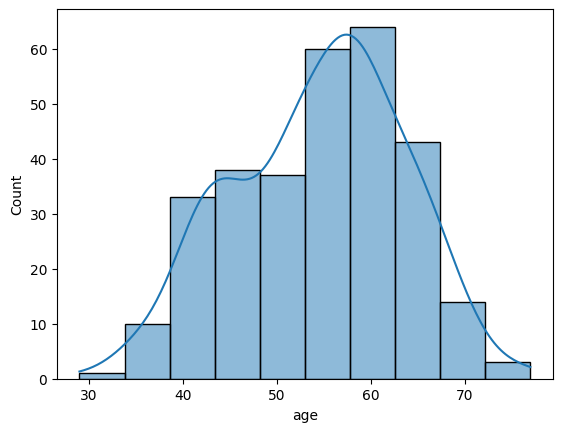

In [12]:
sns.histplot(df, x='age', kde=True, bins=10);

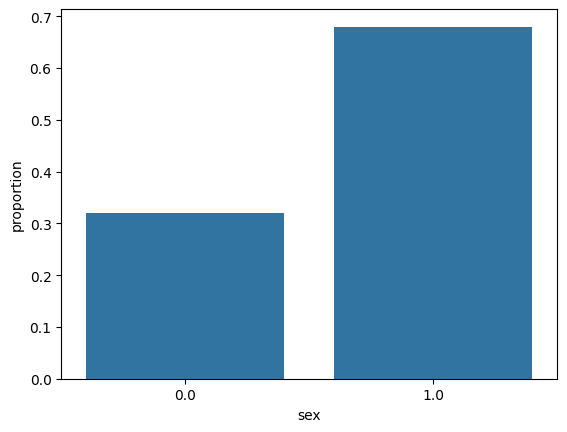

In [13]:
sns.countplot(df, x='sex', stat='proportion');

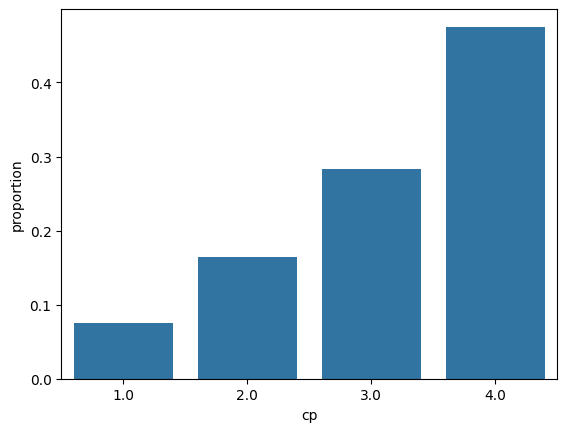

In [14]:
sns.countplot(df, x='cp', stat='proportion');

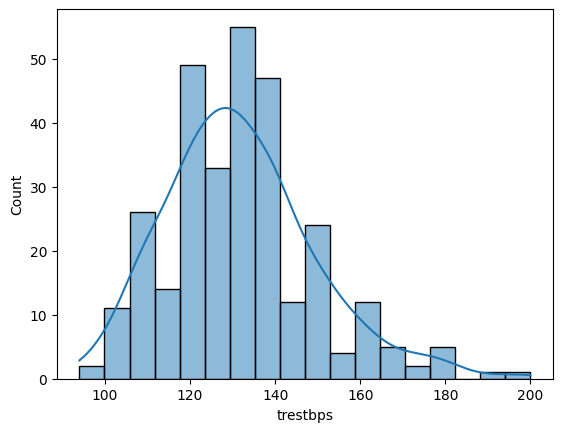

In [15]:
sns.histplot(df, x='trestbps',kde=True);

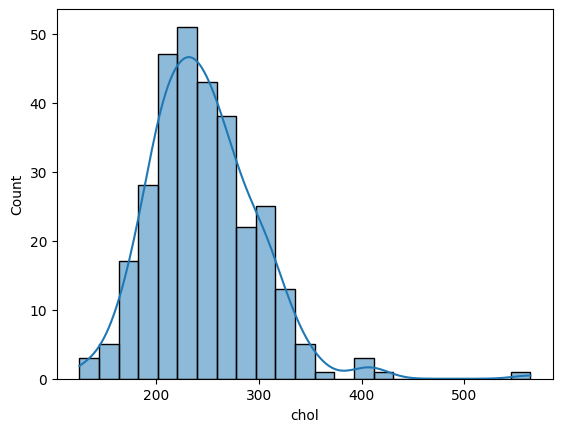

In [16]:
sns.histplot(df, x='chol',kde=True);

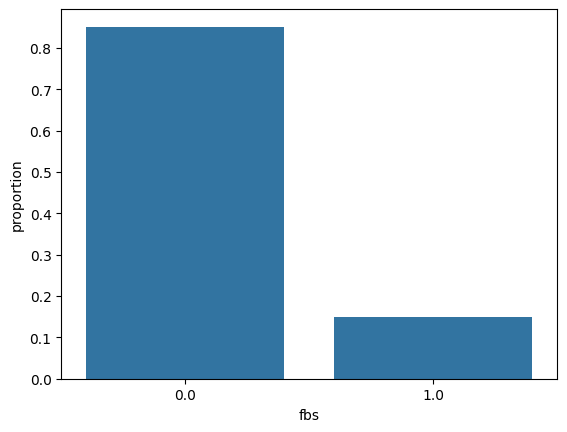

In [17]:
sns.countplot(df, x='fbs', stat='proportion');

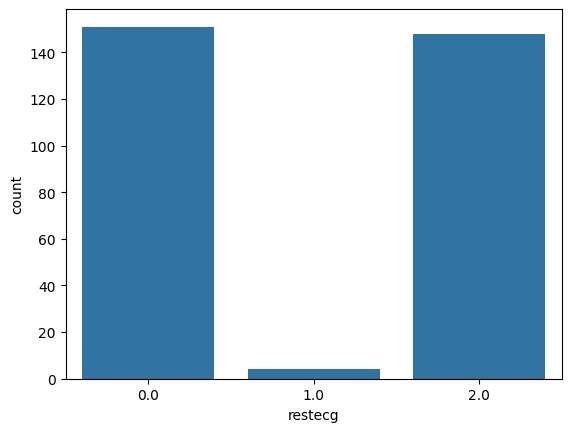

In [18]:
sns.countplot(df, x='restecg');

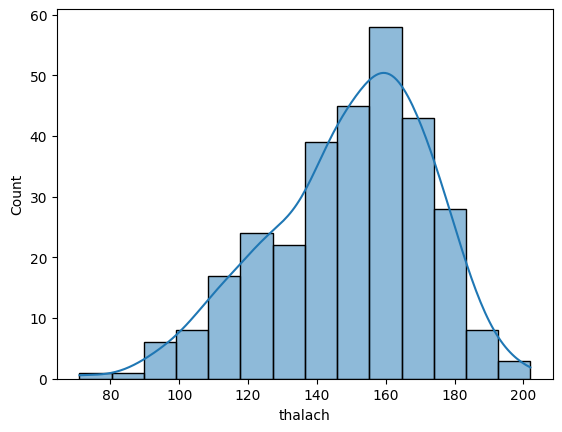

In [19]:
sns.histplot(df, x='thalach',kde=True);

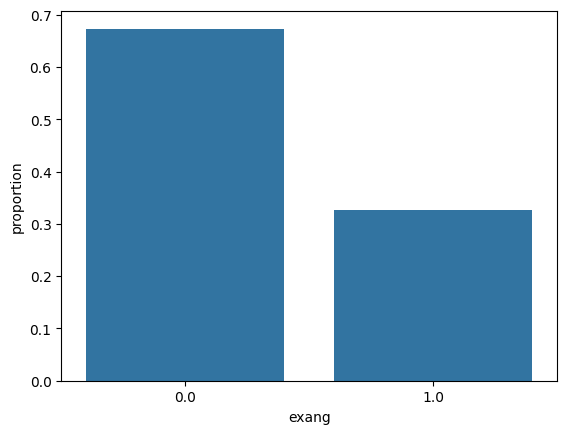

In [20]:
sns.countplot(df, x='exang', stat='proportion');

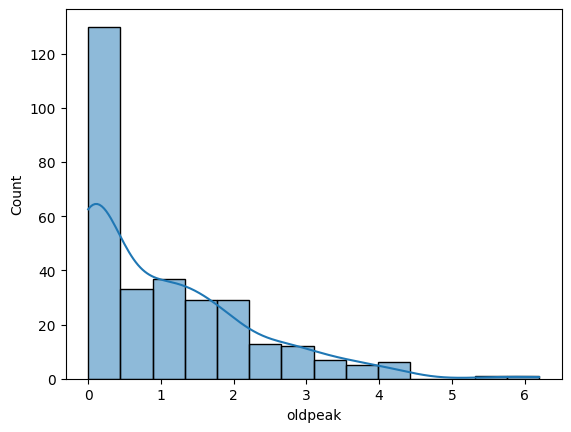

In [21]:
sns.histplot(df, x='oldpeak', kde=True);

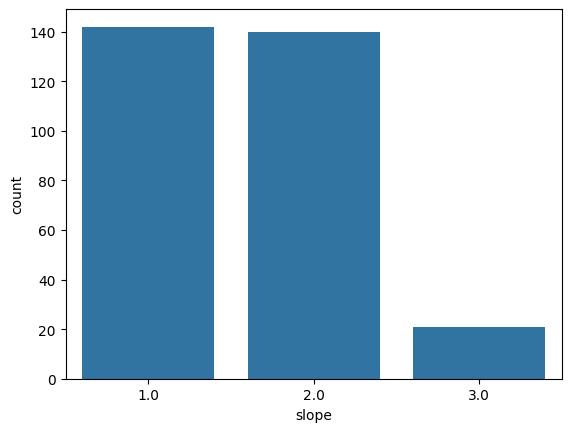

In [22]:
sns.countplot(df, x='slope');

<Axes: xlabel='ca', ylabel='count'>

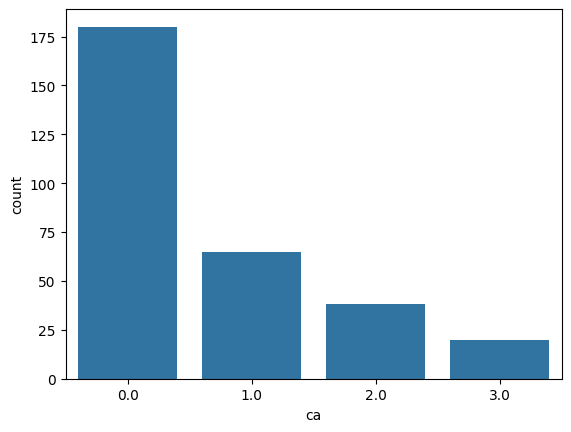

In [23]:
sns.countplot(df, x='ca')

<Axes: xlabel='thal', ylabel='count'>

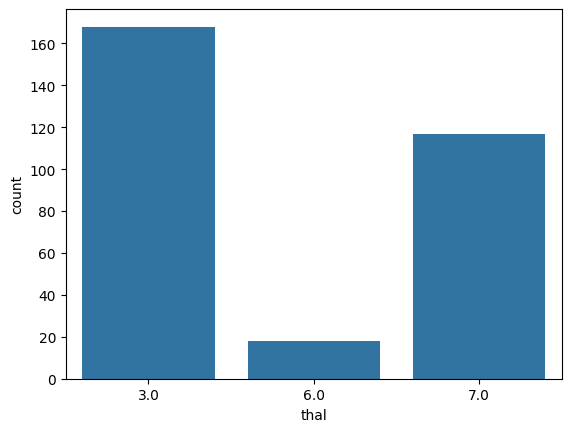

In [24]:
sns.countplot(df, x='thal')

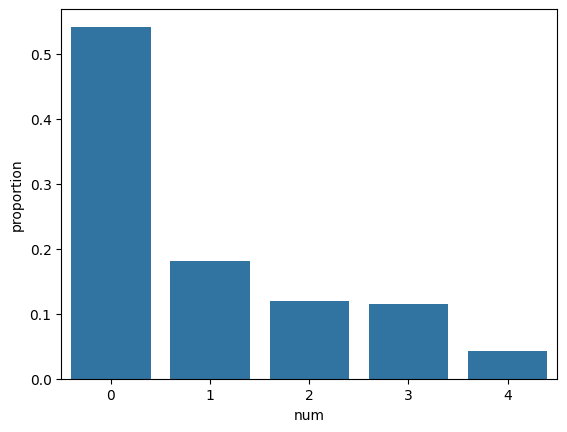

In [25]:
sns.countplot(df, x='num', stat='proportion');

# Bivariate analysis

<Figure size 1500x1000 with 0 Axes>

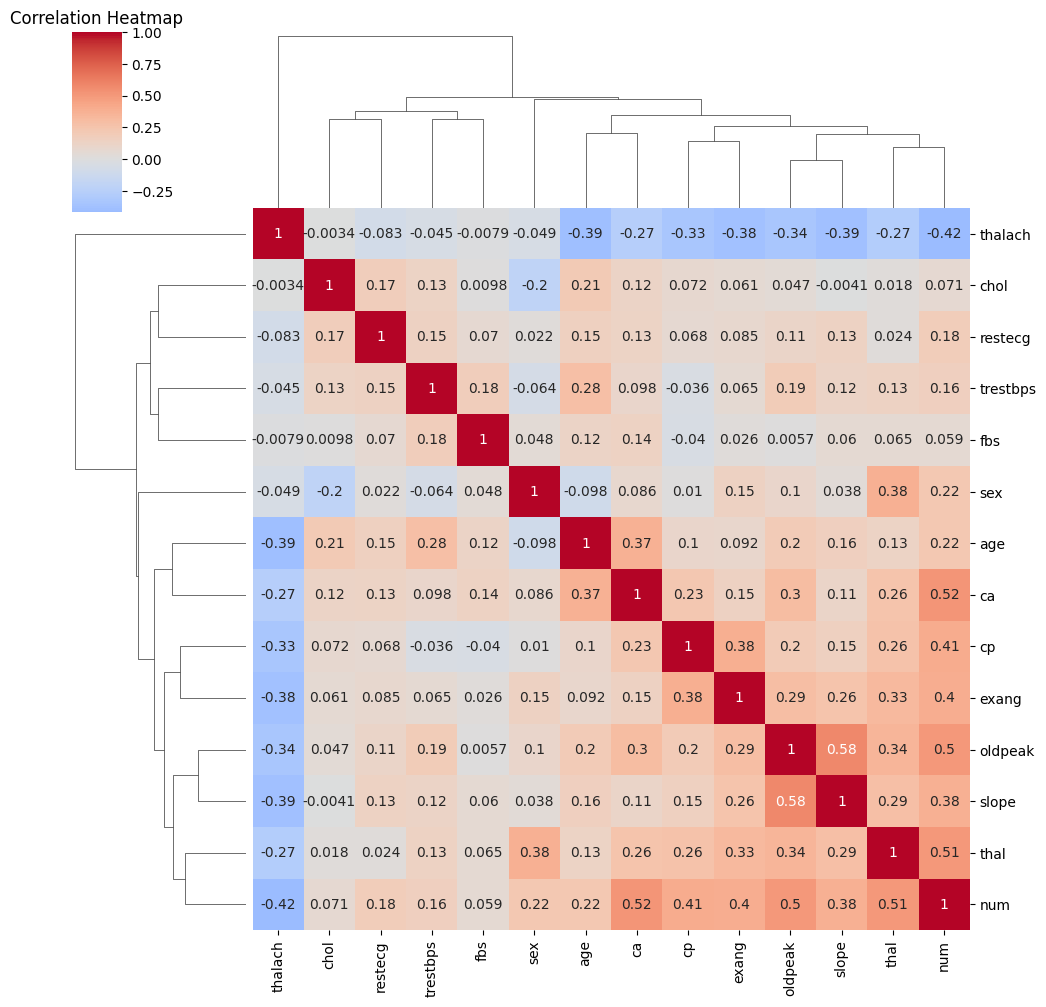

In [26]:
# Let's check the correlation between the features
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Data preparation

In [ ]:
df2 = df.copy()


In [91]:
# Some columns in our data are not numeric in nature and actually categorical. We need to convert them to categorical variables.
# These columns are sex, cp, fbs, exang, slope, thal
df2[['sex', 'cp', 'fbs', 'exang', 'slope', 'thal']] = df2[['sex', 'cp', 'fbs', 'exang', 'slope', 'thal']].astype('category')

In [92]:

# Let's combine all the possible options in 'num' into only two options: 0 and 1, for proper classification
df2['num'] = df2['num'].apply(lambda x: 0 if x == 0 else 1)
#Let's check the new values
df2['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

There is no much difference between the classes so the is no need to over/undersampling the data.

In [93]:
# The data will be divided into three sets: training, validation and test
# Training set will be used for training the model with 70% or the data. This will be further divided into training and validation sets
df_train = df2.sample(frac=0.7, random_state=21)
X = df_train.drop(columns=['num'])
y = df_train['num']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

# Testing set will be used for testing the model with 30% of the data.
df_test = df2.sample(frac=0.3, random_state=21)
X_test = df_test.drop(columns=['num'])
y_test = df_test['num']

In [94]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_val = pd.DataFrame(scaler.transform(X_val))
X_test = pd.DataFrame(scaler.transform(X_test))

In [95]:
X_train.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.145478,-1.500000,-0.090748,-1.461542,-2.053136,-0.436051,-0.988270,1.064670,-0.639010,-0.365531,0.659209,-0.683202,-0.916745
1,-1.035486,0.666667,0.931675,-1.048103,0.294522,-0.436051,1.023991,1.507627,-0.639010,-0.915455,-0.955375,-0.683202,-0.916745
2,1.604319,0.666667,-2.135593,1.609724,-0.218411,2.293307,1.023991,-0.884341,-0.639010,-0.823801,0.659209,0.416428,-0.916745
3,0.614392,0.666667,0.931675,-0.162161,0.156425,-0.436051,-0.988270,-0.308497,1.564922,0.367700,-0.955375,0.416428,1.169853
4,-0.045559,0.666667,0.931675,-1.343417,-0.119770,-0.436051,-0.988270,-1.105820,1.564922,1.650856,0.659209,0.416428,1.169853


In [96]:
X_val.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.475453,0.666667,-1.113170,-0.752789,-1.737484,-0.436051,-0.988270,1.374740,-0.639010,-0.915455,-0.955375,-0.683202,-0.916745
1,-1.475453,-1.500000,-1.113170,-0.162161,-0.810258,-0.436051,1.023991,0.931782,-0.639010,0.367700,-0.955375,-0.683202,-0.916745
2,0.834376,-1.500000,0.931675,1.609724,-1.599387,-0.436051,1.023991,-0.264202,-0.639010,4.767090,2.273793,2.615689,1.169853
3,-0.155551,0.666667,0.931675,-0.575600,0.728543,-0.436051,-0.988270,-2.478987,1.564922,0.917624,0.659209,1.516059,1.169853
4,0.724384,0.666667,-2.135593,0.074091,-0.218411,-0.436051,-0.988270,-0.264202,-0.639010,1.467548,0.659209,1.516059,-0.916745


Our model is trying to predict heart disease to be able to treat and improve results on patients. So, based on the data we can expect this four cases that will tell us how good is our model.

- True positives = Patients that are classified as having the disease and actually having the disease.
- False positives = Patients that are classified as having the disease and not having the disease.
- True Negatives = Patients that are classified as not having the disease and are actually disease free.
- False negatives = Patients that are classified as not having the disease and actually havig the disease. 

As we are trying to classify the majority of true positive cases as positives, we are going to optimize the recall of the model.

## Defining some needed functions and variables

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [99]:
# Defining a scorer for cross-validation and grid search (hyperparameter tuning)
scorer = metrics.make_scorer(metrics.recall_score)

# Model Building

In [100]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = []
# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1, max_iter=2000)))
models.append(("Bagging", BaggingClassifier(random_state=1, n_estimators=200)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))

results_original = []  # Empty list to store all model's CV scores
validation_original = []  # Empty list to store all model's validation scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results_original.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    val_score = recall_score(y_val, model.predict(X_val))  # Calculate recall score
    validation_original.append(val_score)  # Append validation score
    print(f"{name}: {val_score}")  # Print validation score


Cross-Validation performance on training dataset:

Logistic Regression: 0.8125
Bagging: 0.7375
Random forest: 0.7625
GBM: 0.7625
Adaboost: 0.8375
Xgboost: 0.7875
Decision Tree: 0.7

Validation Performance:

Logistic Regression: 0.85
Bagging: 0.8
Random forest: 0.8
GBM: 0.85
Adaboost: 0.95
Xgboost: 0.85
Decision Tree: 0.6


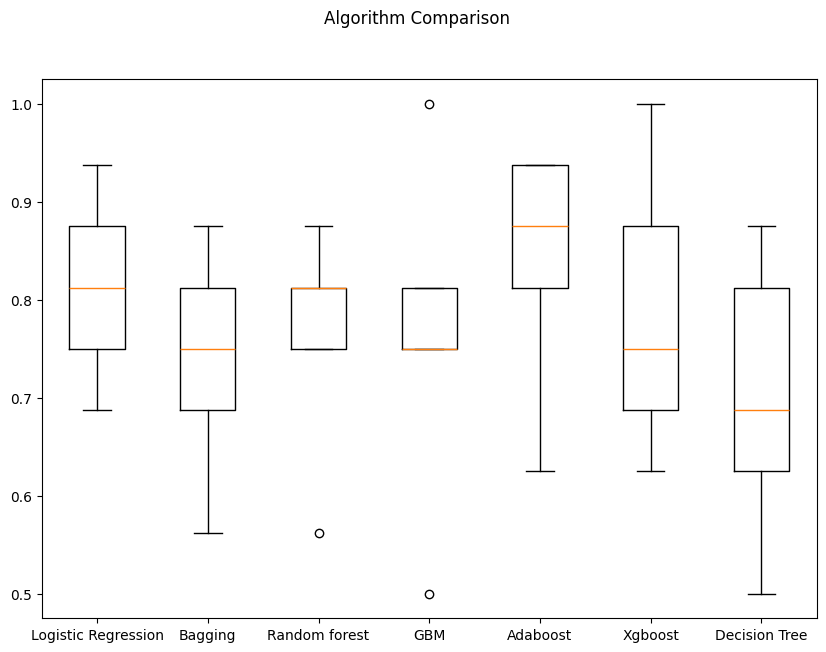

In [101]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_original)
ax.set_xticklabels(names)

plt.show()

Results with logistic regression and Adaboost seem to be best among our models. We can check the performance of these model in the test data.

### Logistic regression model:

In [102]:
model_1 = LogisticRegression(random_state=1, max_iter=2000)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=1)

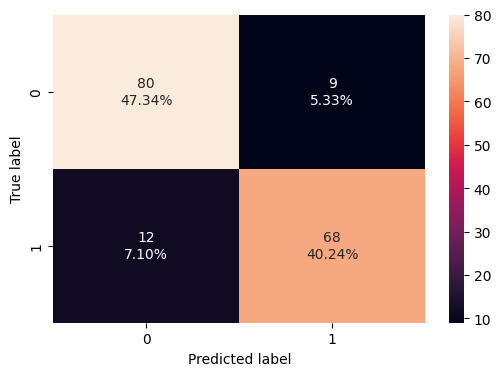

In [103]:
# Checking performance on training set
confusion_matrix_sklearn(model_1, X_train, y_train)

In [104]:
model1_train_perf = model_performance_classification_sklearn(
    model_1, X_train, y_train
)
model1_train_perf

,Accuracy,Recall,Precision,F1
0,0.87574,0.85,0.883117,0.866242


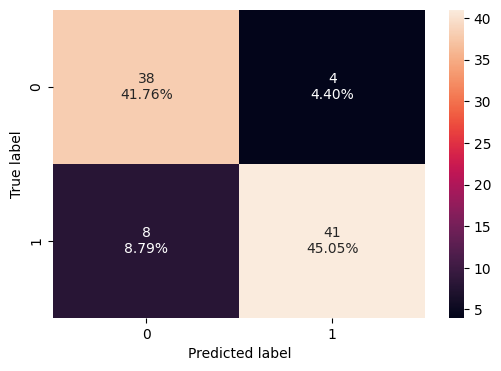

In [105]:
# Checking performance on test set
confusion_matrix_sklearn(model_1, X_test, y_test)

In [106]:
model1_test_perf = model_performance_classification_sklearn(
    model_1, X_test, y_test
)
model1_test_perf

,Accuracy,Recall,Precision,F1
0,0.868132,0.836735,0.911111,0.87234


## Adaboost model:

In [107]:
model_2 = AdaBoostClassifier(random_state=1)
model_2.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

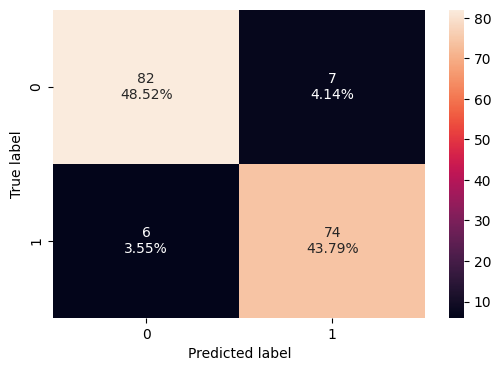

In [108]:
# Checking performance on training set
confusion_matrix_sklearn(model_2, X_train, y_train)

In [109]:
model2_train_perf = model_performance_classification_sklearn(
    model_2, X_train, y_train
)
model2_train_perf

,Accuracy,Recall,Precision,F1
0,0.923077,0.925,0.91358,0.919255


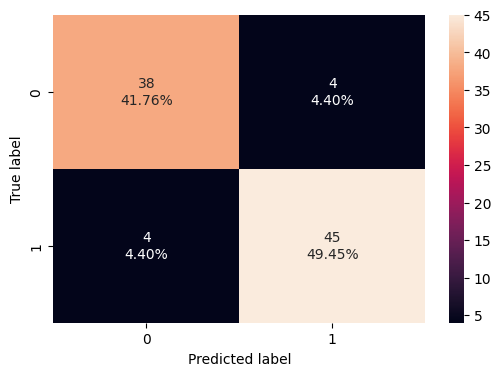

In [110]:
# Checking performance on training set
confusion_matrix_sklearn(model_2, X_test, y_test)

In [111]:
model2_test_perf = model_performance_classification_sklearn(
    model_2, X_test, y_test
)
model2_test_perf

,Accuracy,Recall,Precision,F1
0,0.912088,0.918367,0.918367,0.918367


## Model Comparison

In [112]:
# Training performance of the models

model_train_performance = pd.concat(
    [model1_train_perf, model2_train_perf],
    axis=0,
)
model_train_performance["Data"] = ["Logistic regression", "Adaboost"]
model_train_performance = model_train_performance.set_index("Data")
model_train_performance

,Accuracy,Recall,Precision,F1
Data,,,,
Logistic regression,0.875740,0.850,0.883117,0.866242
Adaboost,0.923077,0.925,0.913580,0.919255


In [113]:
# Training performance of the models
model_train_performance = pd.concat(
    [model1_test_perf, model2_test_perf],
    axis=0,
)
model_train_performance["Data"] = ["Logistic regression", "Adaboost"]
model_train_performance = model_train_performance.set_index("Data")
model_train_performance

,Accuracy,Recall,Precision,F1
Data,,,,
Logistic regression,0.868132,0.836735,0.911111,0.872340
Adaboost,0.912088,0.918367,0.918367,0.918367


# Final Model

Both of out models are giving good results. But Adaboost is giving better results so is going to be selected as our main model

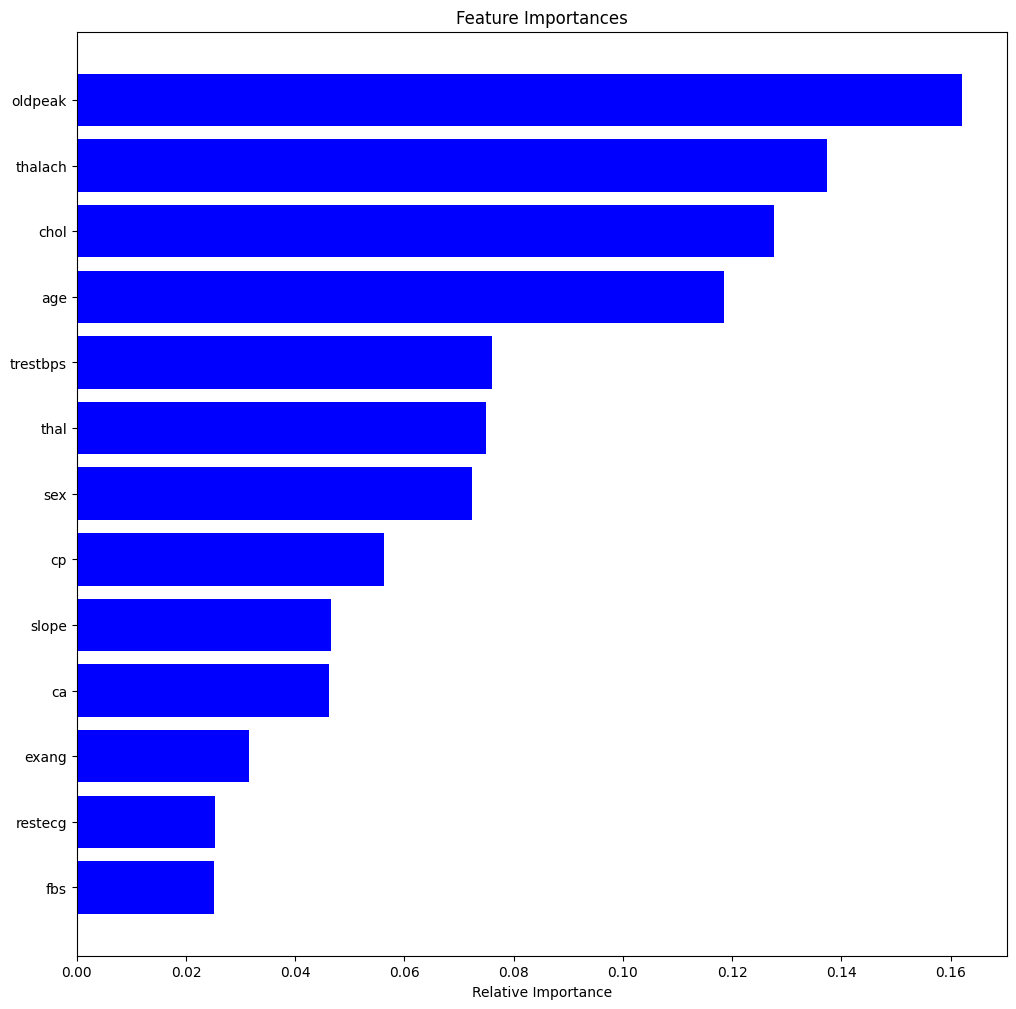

In [115]:
# Checking the most important features in our data set. (Which features are most important for the model)
feature_names = X.columns
importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to this model, the most important predictor for a heart disease (independent of which type it is) are oldpeak, thalach, col and age. 

These features are ST depression induced by exercise relative to rest, maximum heart rate achieved, cholesterol levels and the age of the patient. Which is normal considering that factor always thought to be important for a heart disease are the cholesterol levels and age. Interestedly enough induce ST depression seems to be the highest predictor which can predict some diseases like ischemia but that can be in some cases unspecific if other factors are present (electrolyte imbalance, some medication, etc).